# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [2]:
url = 'https://raw.githubusercontent.com/SulemanJaved/piaic-quarter2-assignments/master/quarter2_dlAssignment/datasets/CementStrenght_Assignment.csv'
data = pd.read_csv(url)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
pd.isnull(data).any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [5]:
data_mean = data.mean(axis=0)
data -= data_mean
data_std = data.std(axis=0)
data /= data_std
print(data.shape)
data.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732


In [6]:
data1 = data.sample(frac=1).reset_index(drop=True)

s_train = data1.iloc[:515, :8]
l_train = data1.iloc[:515, 8:]

s_test = data1.iloc[515:824, :8]
l_test = data1.iloc[515:824, 8:]

s_val = data1.iloc[824:1030, :8]
l_val = data1.iloc[824:1030, 8:]


In [7]:
print(s_train.shape)
print(l_train.shape)
print(s_test.shape)
print(l_test.shape)
print(s_val.shape)
print(l_val.shape)

(515, 8)
(515, 1)
(309, 8)
(309, 1)
(206, 8)
(206, 1)


In [8]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='tanh'))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [9]:
model = build_model()
history = model.fit(s_train, l_train, epochs=100, batch_size=64, 
                    validation_data = (s_val, l_val))

Epoch 1/100
9/9 [==============================] - 1s 57ms/step - loss: 0.9596 - mae: 0.8179 - val_loss: 0.8544 - val_mae: 0.7427
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7707 - mae: 0.7221 - val_loss: 0.7737 - val_mae: 0.7089
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6680 - mae: 0.6754 - val_loss: 0.7243 - val_mae: 0.6873
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6278 - mae: 0.6566 - val_loss: 0.6605 - val_mae: 0.6501
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5838 - mae: 0.6317 - val_loss: 0.6190 - val_mae: 0.6254
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5833 - mae: 0.6246 - val_loss: 0.5786 - val_mae: 0.6039
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4946 - mae: 0.5741 - val_loss: 0.5348 - val_mae: 0.5828
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4449 - mae: 0.5517 - va

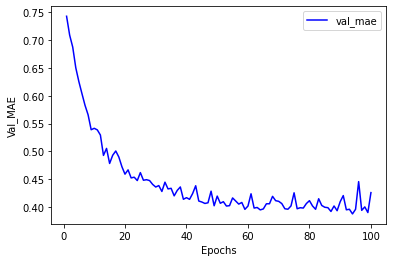

In [10]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(val_mae) + 1)
plt.plot(epochs, val_mae, 'b', label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('Val_MAE')
plt.legend()
plt.show()

In [11]:
model = build_model()
model.fit(s_train, l_train, epochs=60, batch_size=64)
test_mse_score, test_mae_score = model.evaluate(s_test, l_test)

Epoch 1/60
9/9 [==============================] - 1s 2ms/step - loss: 0.9859 - mae: 0.8227
Epoch 2/60
9/9 [==============================] - 0s 2ms/step - loss: 0.9489 - mae: 0.8074
Epoch 3/60
9/9 [==============================] - 0s 2ms/step - loss: 0.8472 - mae: 0.7490
Epoch 4/60
9/9 [==============================] - 0s 2ms/step - loss: 0.8026 - mae: 0.7329
Epoch 5/60
9/9 [==============================] - 0s 2ms/step - loss: 0.8024 - mae: 0.7344
Epoch 6/60
9/9 [==============================] - 0s 2ms/step - loss: 0.7427 - mae: 0.7073
Epoch 7/60
9/9 [==============================] - 0s 2ms/step - loss: 0.6796 - mae: 0.6665
Epoch 8/60
9/9 [==============================] - 0s 2ms/step - loss: 0.6215 - mae: 0.6186
Epoch 9/60
9/9 [==============================] - 0s 2ms/step - loss: 0.5385 - mae: 0.5853
Epoch 10/60
9/9 [==============================] - 0s 2ms/step - loss: 0.5625 - mae: 0.5846
Epoch 11/60
9/9 [==============================] - 0s 2ms/step - loss: 0.5478 - mae: 0.57

In [12]:
print('MAE Score:', test_mae_score)
print('MSE Score:', test_mse_score)

MAE Score: 0.42558836936950684
MSE Score: 0.3092537224292755
